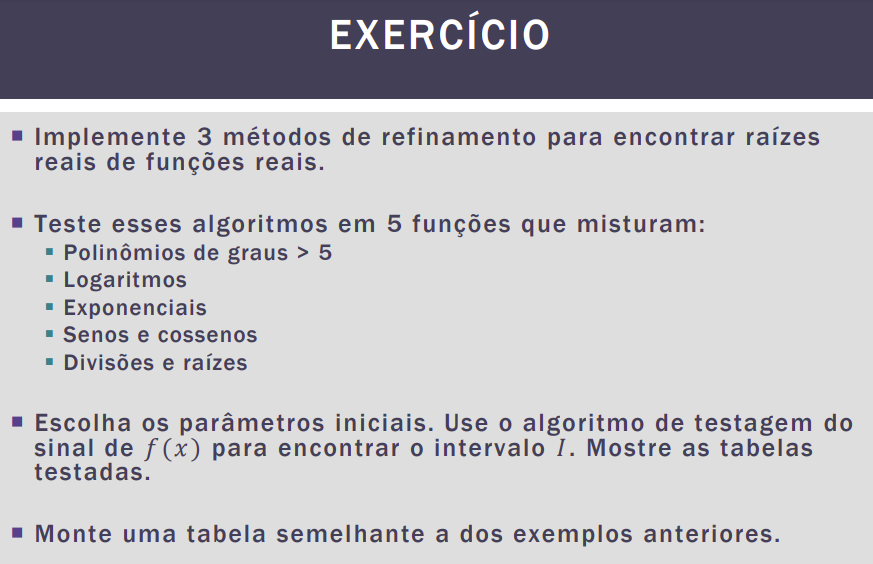

# Implementação do método da bissecção

In [ ]:
def bisseccao(f, a, b, e):
    i=0
    ai=a
    bi=b

    while abs(bi-ai) > e:
        pi = (ai+bi)/2
        # print("a{}: {};  b{}: {};  p{}: {};".format(i,ai,i,bi,i,pi))
        if f(ai)*f(pi)<0:
            bi = pi
        else:
            ai = pi
        i+=1

    x = (ai+bi)/2
    return [f'{x}', f'{f(x)}', f'{i}']

# Implementação do método da posição falsa

In [ ]:
def posicaoFalsa(f, a, b, e):
    i=0
    ai=a
    bi=b
    pi = (ai*f(bi)-bi*f(ai))/(f(bi) - f(ai))
    while abs(bi-ai) > e and abs(f(pi)) > e:
        pi = (ai*f(bi)-bi*f(ai))/(f(bi) - f(ai))
        # print("a{}: {};  b{}: {};  p{}: {};".format(i,ai,i,bi,i,pi))
        if f(ai)*f(pi)<0:
            bi = pi
        else:
            ai = pi
        i+=1

    x = pi
    return [f'{x}', f'{f(x)}', f'{i}']

# Implementação do método da secante

In [ ]:
def metodoSecante(f, x0, x1, e1=0.0000001, e2=0.0000001, it_max=1000000):
    if abs(f(x0)) < e1:
        return x0
    
    if abs(f(x1)) < e1 and abs(x1 - x0) < e2:
        return x1
    
    x = x1 - (f(x1) / (f(x1)-f(x0))) * (x1-x0)
    k = 0

    while (abs(f(x)) > e1 and abs(x - x1) > e2 and k < it_max):
        x0 = x1
        x1 = x 
        x = x1 - ((f(x1) / (f(x1) - f(x0))) * (x1 - x0))
        k += 1

    return [f'{x}', f'{f(x)}', f'{k}']

# 5 Funções escolhidas para teste:
- função 1: $$ f(x) = x^6 + \ln(x) + e^x + \sin(x) + \cos(x) + \frac{x}{3} + \sqrt{x} $$ 
- função 2: $$ g(x) = 6x^7 + \ln(x) + x + \sin(x) + \cos(x) + \frac{x}{3} + \sqrt{x} $$ 
- função 3: $$ h(x) = x^8 + \ln(x^2) + e^{\frac{x}{2}} + \sin(x) + \cos(x) + \frac{x}{8} + \sqrt{20-x} $$ 
- função 4: $$ k(x) = x^9 + \ln\left(x^2+\frac{1}{2}\right) + 10x + \sin(x) + \cos(x) + \frac{x}{2} + \sqrt{x+1} $$
- função 5: $$ m(x) = x^{10} + \ln(x+2) + 30x + \sin(x) + \cos(x) + \frac{x}{7} + \sqrt{3x+1} $$ 

# Implementação das funções de teste

In [ ]:
import math

In [ ]:
# FUNÇÃO 1
def f(x):
    return x**6 + math.log(x) + math.exp(x) + math.sin(x) + math.cos(x) + x/3 + math.sqrt(x)

# FUNÇÃO 2
def g(x):
    return 6*x**7 + math.log(x) + x + math.sin(x) + math.cos(x) + x/3 + math.sqrt(x)

# FUNÇÃO 3
def h(x):
    return x**8 + math.log(x**2) + math.exp(x/2) + math.sin(x) + math.cos(x) + x/8 + math.sqrt(20-x)

# FUNÇÃO 4
def k(x):
    return x**9 + math.log((x**2) + 1/2) + 10*x + math.sin(x) + math.cos(x) + x/2 + math.sqrt(x+1)

# FUNÇÃO 5
def m(x):
    return x**10 + math.log(x+2) + 30*x + math.sin(x) + math.cos(x) + x/7 + math.sqrt(3*x+1)
  
#Função teste
def n(x):
    return x**5 + (10/9)*x**3 + (5/21)*x

# Obtendo a precisão da máquina

In [ ]:
def buscadorDePrecisao():
  A = 1
  s = 2

  while s > 1: 
    A = A/2 
    s = 1 + A 

  return A*2

precisao = buscadorDePrecisao()

# teste para a função 1:

In [ ]:
import re
import pandas as pd


def showTableWithValuesOfX(function, *XValues):
    datas = {"x":[], "f(x)":[]}
    filteredDatas = {"x":[], "f(x)":[]}
    

    for XValue in XValues:
        datas['x'].append(XValue)
        datas['f(x)'].append(function(XValue))

    FXs = datas['f(x)']
    Xs = datas['x']
    for i, FX in enumerate(FXs):
        if i > 0 and FXs[i-1] * FX < 0:
            filteredDatas['x'].append(Xs[i-1])
            filteredDatas['f(x)'].append(FXs[i-1])
            filteredDatas['x'].append(Xs[i])
            filteredDatas['f(x)'].append(FX)

    
    table = pd.DataFrame(datas)
    table = table.set_index('x')
    filteredTable = pd.DataFrame(filteredDatas)
    filteredTable = filteredTable.set_index('x')
    table = table.style.set_properties(**{'text-align': 'center'})
    filteredTable = filteredTable.style.set_properties(**{'text-align': 'center'})
    return {'table':table, 'filteredTable':filteredTable}

In [ ]:
import pandas as pd
tables = showTableWithValuesOfX(lambda x: n(x), 0.01,0.05,0.10,0.15)
print(f"\033[1;36m{'Tabela de Sinais de n(x) no Intervalo de x de 0.01 à 0.15':^90}\033[m")
display(tables['table'])

testeF1Bisseccao = bisseccao(lambda x: n(x), -1, 1, precisao)
testeF1PosicaoFalsa = posicaoFalsa(lambda x: n(x), -1, 1, precisao)
testeF1MetodoSecante = metodoSecante(lambda x: n(x), -1, 1, precisao, precisao)
testeF1Bisseccao.insert(1,'[0.05, 0.1]')
testeF1Bisseccao.insert(3,f'{math.fabs(0.834443600305 - float(testeF1Bisseccao[0]))}')
testeF1PosicaoFalsa.insert(1,'[0.05, 0.1]')
testeF1PosicaoFalsa.insert(3,f'{math.fabs(0.834443600305 - float(testeF1PosicaoFalsa[0]))}')
testeF1MetodoSecante.insert(1,'[0.05, 0.1]')
testeF1MetodoSecante.insert(3,f'{math.fabs(0.834443600305 - float(testeF1MetodoSecante[0]))}')

datas = {
        "Bissecção": testeF1Bisseccao,
        "Posição Falsa": testeF1PosicaoFalsa,
        "Secante": testeF1MetodoSecante
         }

index = ['x', 'Dados inicias', 'f(x)', 'Erro em x', 'Número de iterações']
dataFrame = pd.DataFrame(datas, index)
print(f"\033[1;36m{'Tabela Comparativa dos Métodos':^90}\033[m")
display(dataFrame)

                Tabela de Sinais de n(x) no Intervalo de x de 0.01 à 0.15                 


,f(x)
x,
0.010000,0.002382
0.050000,0.012044
0.100000,0.024931
0.150000,0.039540


                              Tabela Comparativa dos Métodos                              


,Bissecção,Posição Falsa,Secante
x,0.9999999999999999,0.0,0.0
Dados inicias,"[0.05, 0.1]","[0.05, 0.1]","[0.05, 0.1]"
f(x),2.3492063492063484,0.0,0.0
Erro em x,0.1655563996949999,0.834443600305,0.834443600305
Número de iterações,53,0,0


# Teste para a função 2:

In [ ]:
tables = showTableWithValuesOfX(lambda x: g(x), 0.01,0.05,0.10,0.15,0.20,0.25,0.30)
print(f"\033[1;36m{'Tabela de Sinais de f(x) no Intervalo de x de 0.01 à 0.30':^90}\033[m")
display(tables['table'])

testeF2Bisseccao = bisseccao(lambda x: g(x), 0.1, 0.30, precisao)
testeF2PosicaoFalsa = posicaoFalsa(lambda x: g(x), 0.1, 0.30, precisao)
testeF2MetodoSecante = metodoSecante(lambda x: g(x), 0.01, 0.30, precisao, precisao)
testeF2Bisseccao.insert(1,'[0.01, 0.30]')
testeF2Bisseccao.insert(3,f'{abs(0.1676526663369 - float(testeF2Bisseccao[0]))}')
testeF2PosicaoFalsa.insert(1,'[0.01, 0.30]')
testeF2PosicaoFalsa.insert(3,f'{abs(0.1676526663369 - float(testeF2PosicaoFalsa[0]))}')
testeF2MetodoSecante.insert(1,'[0.01, 0.30]')
testeF2MetodoSecante.insert(3,f'{abs(0.1676526663369 - float(testeF2MetodoSecante[0]))}')

datas2 = {
        "Bissecção": testeF2Bisseccao,
        "Posição Falsa": testeF2PosicaoFalsa,
        "Secante": testeF2MetodoSecante
         }

index = ['x', 'Dados inicias', 'f(x)', 'Erro em x', 'Número de iterações']
dataFrame2 = pd.DataFrame(datas2, index)
print(f"\033[1;36m{'Tabela Comparativa dos Métodos':^90}\033[m")
display(dataFrame2)

                Tabela de Sinais de f(x) no Intervalo de x de 0.01 à 0.30                 


,f(x)
x,
0.010000,-3.481887
0.050000,-1.656729
0.100000,-0.758186
0.150000,-0.171602
0.200000,0.283255
0.250000,0.663722
0.300000,0.995919


                              Tabela Comparativa dos Métodos                              


,Bissecção,Posição Falsa,Secante
x,0.16765266648224111,0.16765266648224114,0.16765266648224111
Dados inicias,"[0.01, 0.30]","[0.01, 0.30]","[0.01, 0.30]"
f(x),0.0,2.220446049250313e-16,0.0
Erro em x,1.4534110026609426e-10,1.4534112802166987e-10,1.4534110026609426e-10
Número de iterações,50,20,7


# Teste para a função 3:

In [ ]:
tables = showTableWithValuesOfX(lambda x: h(x), -0.1,-0.04,-0.03,-0.02)
print(f"\033[1;36m{'Tabela de Sinais de f(x) no Intervalo de x de -0.1 à -0.02':^90}\033[m")
display(tables['table'])

testeF3Bisseccao = bisseccao(lambda x: h(x), -0.1, -0.02, precisao)
testeF3PosicaoFalsa = posicaoFalsa(lambda x: h(x), -0.1, -0.02, precisao)
testeF3MetodoSecante = metodoSecante(lambda x: h(x), -0.1, -0.02, precisao, precisao)
testeF3Bisseccao.insert(1,'[-0.01, -0.2]')
testeF3Bisseccao.insert(3,f'{abs(-0.0405557076248 - float(testeF3Bisseccao[0]))}')
testeF3PosicaoFalsa.insert(1,'[-0.01, -0.02]')
testeF3PosicaoFalsa.insert(3,f'{abs(-0.0405557076248 - float(testeF3PosicaoFalsa[0]))}')
testeF3MetodoSecante.insert(1,'[-0.01, -0.02]')
testeF3MetodoSecante.insert(3,f'{abs(-0.0405557076248 - float(testeF3MetodoSecante[0]))}')


datas2 = {
        "Bissecção": testeF3Bisseccao,
        "Posição Falsa": testeF3PosicaoFalsa,
        "Secante": testeF3MetodoSecante
         }

index = ['x', 'Dados inicias', 'f(x)', 'Erro em x', 'Número de iterações']
dataFrame2 = pd.DataFrame(datas2, index)
print(f"\033[1;36m{'Tabela Comparativa dos Métodos':^90}\033[m")
display(dataFrame2)

                Tabela de Sinais de f(x) no Intervalo de x de -0.1 à -0.02                


,f(x)
x,
-0.100000,1.712032
-0.040000,-0.026736
-0.030000,-0.586711
-0.020000,-1.382323


                              Tabela Comparativa dos Métodos                              


,Bissecção,Posição Falsa,Secante
x,-0.040555698139505755,-0.04055569813951023,-0.04055569813951023
Dados inicias,"[-0.01, -0.2]","[-0.01, -0.02]","[-0.01, -0.02]"
f(x),-2.1227464230832993e-13,0.0,0.0
Erro em x,9.485294244493403e-09,9.485289768906835e-09,9.485289768906835e-09
Número de iterações,49,29,8


# Teste para a função 4:

In [ ]:
tables = showTableWithValuesOfX(lambda x: k(x), -0.2,-0.1,-0.05,-0.01)
print(f"\033[1;36m{'Tabela de Sinais de f(x) no Intervalo de x de -0.2 à -0.01':^90}\033[m")
display(tables['table'])

testeF4Bisseccao = bisseccao(lambda x: k(x), -0.2, -0.01, precisao)
testeF4PosicaoFalsa = posicaoFalsa(lambda x: k(x), -0.2, -0.01, precisao)
testeF4MetodoSecante = metodoSecante(lambda x: k(x), -0.2, -0.01, precisao, precisao)
testeF4Bisseccao.insert(1,'[-0.2, -0.01]')
testeF4Bisseccao.insert(3,f'{abs(-0.1102854273622 - float(testeF4Bisseccao[0]))}')
testeF4PosicaoFalsa.insert(1,'[-0.2, -0.01]')
testeF4PosicaoFalsa.insert(3,f'{abs(-0.1102854273622 - float(testeF4PosicaoFalsa[0]))}')
testeF4MetodoSecante.insert(1,'[-0.2, -0.01]')
testeF4MetodoSecante.insert(3,f'{abs(-0.1102854273622 - float(testeF4MetodoSecante[0]))}')


datas2 = {
        "Bissecção": testeF4Bisseccao,
        "Posição Falsa": testeF4PosicaoFalsa,
        "Secante": testeF4MetodoSecante
         }

index = ['x', 'Dados inicias', 'f(x)', 'Erro em x', 'Número de iterações']
dataFrame2 = pd.DataFrame(datas2, index)
print(f"\033[1;36m{'Tabela Comparativa dos Métodos':^90}\033[m")
display(dataFrame2)

                Tabela de Sinais de f(x) no Intervalo de x de -0.2 à -0.01                


,f(x)
x,
-0.200000,-1.040362
-0.100000,0.120509
-0.050000,0.710291
-0.010000,1.186990


                              Tabela Comparativa dos Métodos                              


,Bissecção,Posição Falsa,Secante
x,-0.11028542496338944,-0.11028542496338943,-0.11028542496338942
Dados inicias,"[-0.2, -0.01]","[-0.2, -0.01]","[-0.2, -0.01]"
f(x),-3.3306690738754696e-16,-1.1102230246251565e-16,-1.1102230246251565e-16
Erro em x,2.398810552972641e-09,2.398810566850429e-09,2.3988105807282167e-09
Número de iterações,50,8,4


# teste para a função 5:

In [ ]:
tables = showTableWithValuesOfX(lambda x: m(x), -0.1,-0.05,-0.02,-0.01)
print(f"\033[1;36m{'Tabela de Sinais de f(x) no Intervalo de x de -0.1 à -0.01':^90}\033[m")
display(tables['table'])

testeF5Bisseccao = bisseccao(lambda x: m(x), -0.1, -0.01, precisao)
testeF5PosicaoFalsa = posicaoFalsa(lambda x: m(x), -0.1, -0.01, precisao)
testeF5MetodoSecante = metodoSecante(lambda x: m(x), -0.1, -0.01, precisao, precisao)
testeF5Bisseccao.insert(1,'[-0.1, -0.01]')
testeF5Bisseccao.insert(3,f'{abs(-0.0808834571889 - float(testeF5Bisseccao[0]))}')
testeF5PosicaoFalsa.insert(1,'[-0.1, -0.01]')
testeF5PosicaoFalsa.insert(3,f'{abs(-0.0808834571889 - float(testeF5PosicaoFalsa[0]))}')
testeF5MetodoSecante.insert(1,'[-0.1, -0.01]')
testeF5MetodoSecante.insert(3,f'{abs(-0.0808834571889 - float(testeF5MetodoSecante[0]))}')


datas2 = {
        "Bissecção": testeF5Bisseccao,
        "Posição Falsa": testeF5PosicaoFalsa,
        "Secante": testeF5MetodoSecante
         }

index = ['x', 'Dados inicias', 'f(x)', 'Erro em x', 'Número de iterações']
dataFrame2 = pd.DataFrame(datas2, index)
print(f"\033[1;36m{'Tabela Comparativa dos Métodos':^90}\033[m")
display(dataFrame2)

                Tabela de Sinais de f(x) no Intervalo de x de -0.1 à -0.01                


,f(x)
x,
-0.100000,-0.640601
-0.050000,1.031412
-0.020000,2.029577
-0.010000,2.361542


                              Tabela Comparativa dos Métodos                              


,Bissecção,Posição Falsa,Secante
x,-0.08088346440597294,-0.08088346440597292,-0.08088346440597292
Dados inicias,"[-0.1, -0.01]","[-0.1, -0.01]","[-0.1, -0.01]"
f(x),-7.771561172376096e-16,-2.220446049250313e-16,-2.220446049250313e-16
Erro em x,7.217072939269542e-09,7.217072925391754e-09,7.217072925391754e-09
Número de iterações,49,6,3
